<a href="https://colab.research.google.com/github/Pippala-Rakshitha/Module-03-Lab-02/blob/main/AIML_III_Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [11]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
import numpy as np
from sklearn.metrics import pairwise_distances
def knn(k, X_train, y_train, X_test):
    distances = pairwise_distances(X_test, X_train, metric='euclidean')
    nearest_indices = np.argsort(distances, axis=1)[:, :k]
    k_nearest_neighbors = np.array([X_train[idx] for idx in nearest_indices])
    k_nearest_distances = np.array([distances[i, idx] for i, idx in enumerate(nearest_indices)])
    k_nearest_labels = np.array([y_train[idx] for idx in nearest_indices])
    return k_nearest_neighbors, k_nearest_distances, k_nearest_labels



# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [12]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

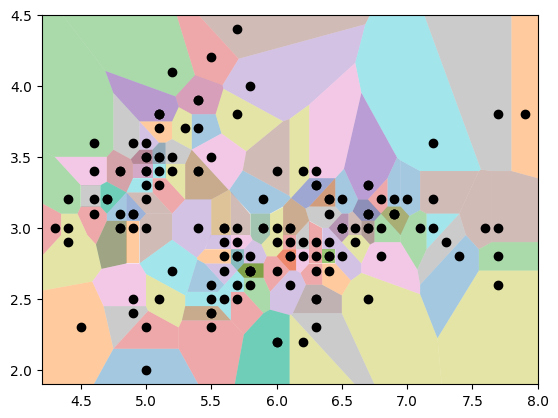

In [13]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [14]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


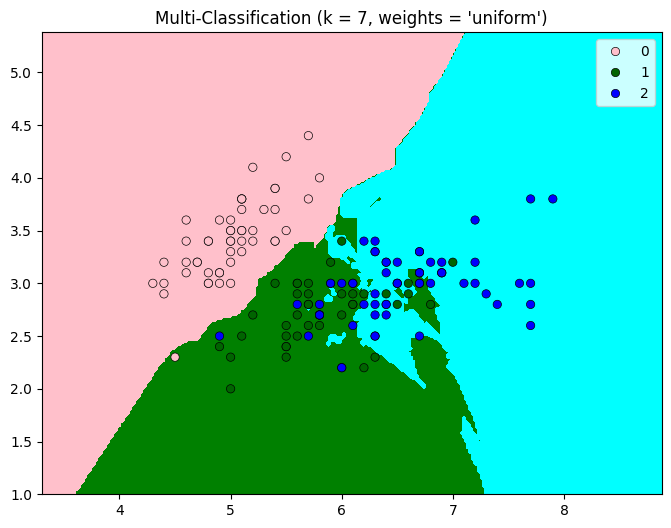

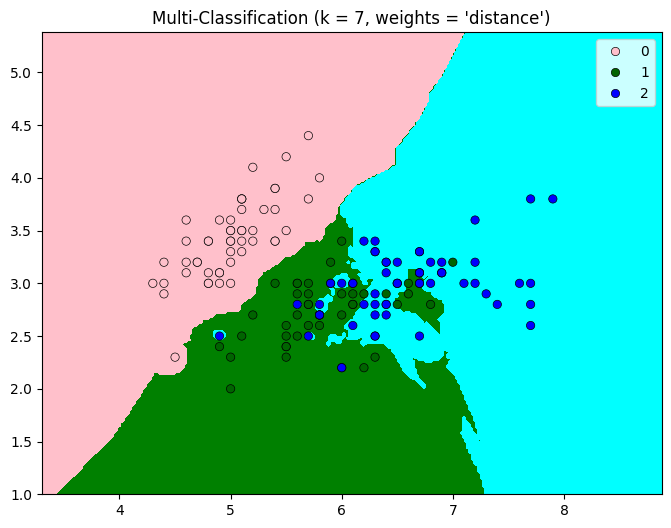

In [15]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

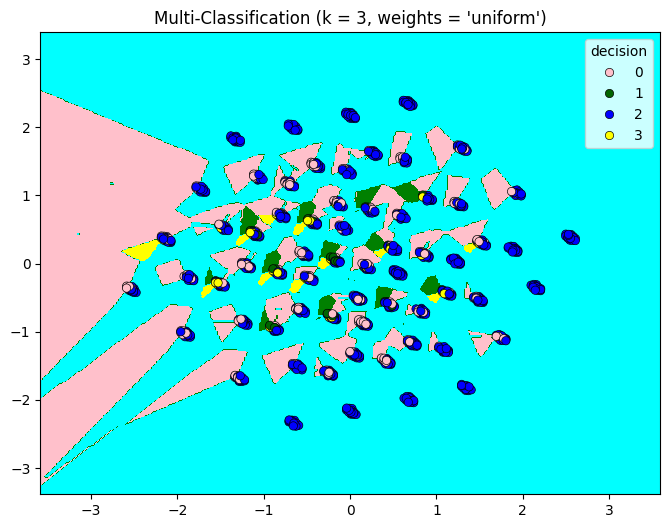

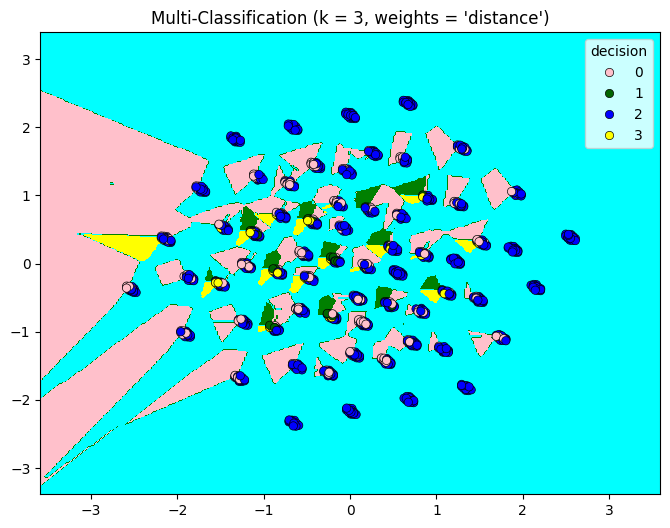

In [18]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import seaborn as sns
data=pd.read_csv('car_evaluation.csv')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop(columns=['decision'])
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
def decision_boundary_plot(x_dec, y_dec, k):
    h = .02
    n = len(set(y_dec))
    cmap_light = ListedColormap(['pink', 'green', 'cyan', 'yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue', 'yellow'][:n]
    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)
        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)
        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Multi-Classification (k = %i, weights = '%s')" % (k, weights))
    plt.show()
k = 3
decision_boundary_plot(X_train_pca, y_train, k)


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [19]:
from sklearn.metrics import confusion_matrix

In [21]:
# print(confusion_matrix(y_test,predictions))
#pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_pca, y_train)
predictions = knn_model.predict(X_test_pca)
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)
print(confusion_matrix)



Predicted   0   1    2  3  All
True                          
0          26   1   50  0   77
1           2   3   10  0   15
2          33  10  190  4  237
3           4   4    9  0   17
All        65  18  259  4  346


Text(0.5, 23.52222222222222, 'Predicted label')

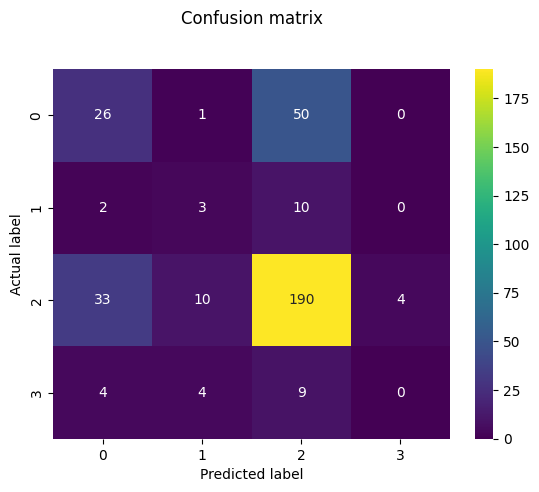

In [22]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [23]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        77
           1       0.17      0.20      0.18        15
           2       0.73      0.80      0.77       237
           3       0.00      0.00      0.00        17

    accuracy                           0.63       346
   macro avg       0.33      0.33      0.33       346
weighted avg       0.60      0.63      0.61       346



### **Car Evaluation Dataset**

In [24]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation (1).csv


In [25]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [26]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [27]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


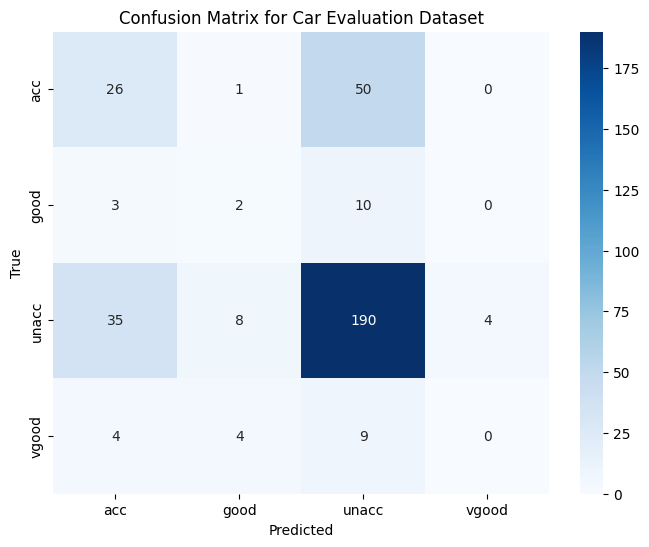

In [30]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset
data = pd.read_csv('car_evaluation.csv')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop(columns=['decision'])
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_pca, y_train)
predictions = knn_model.predict(X_test_pca)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['decision'].classes_, yticklabels=label_encoders['decision'].classes_)
plt.title('Confusion Matrix for Car Evaluation Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset
from sklearn.metrics import classification_report
data = pd.read_csv('car_evaluation.csv')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop(columns=['decision'])
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_pca, y_train)
predictions = knn_model.predict(X_test_pca)
report = classification_report(y_test, predictions, target_names=label_encoders['decision'].classes_)
print(report)


              precision    recall  f1-score   support

         acc       0.38      0.34      0.36        77
        good       0.13      0.13      0.13        15
       unacc       0.73      0.80      0.77       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.63       346
   macro avg       0.31      0.32      0.31       346
weighted avg       0.59      0.63      0.61       346



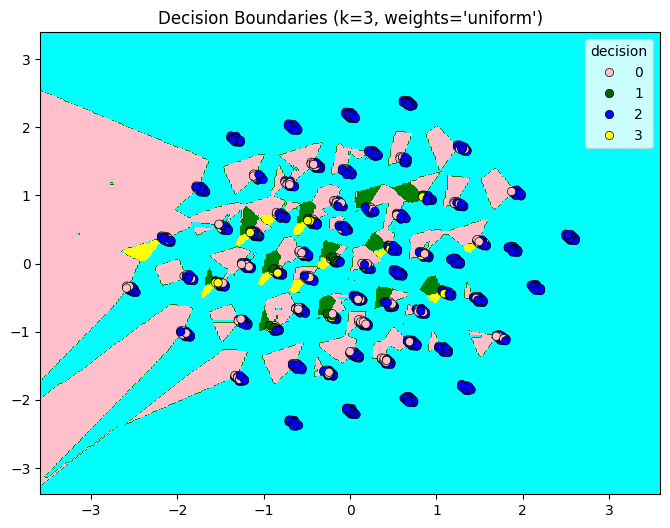

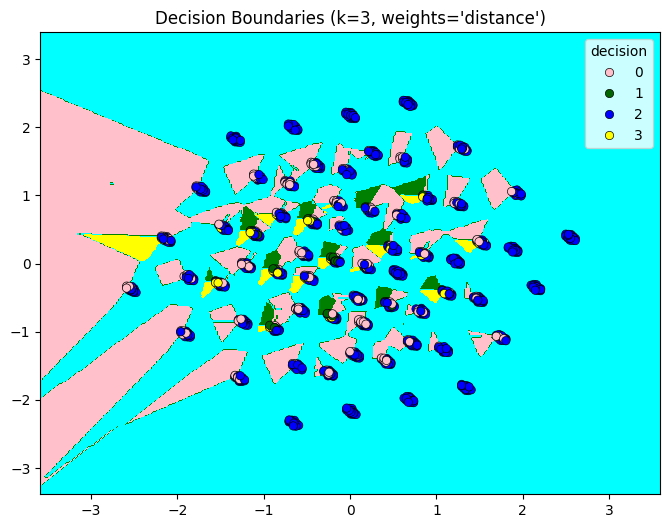

In [37]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import seaborn as sns
data = pd.read_csv('car_evaluation.csv')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop(columns=['decision'])
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
def decision_boundary_plot(X, y, k):
    h = .02
    n = len(set(y))
    cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]
    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(X, y)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Decision Boundaries (k={k}, weights='{weights}')")
    plt.show()
decision_boundary_plot(X_train_pca, y_train, k=3)







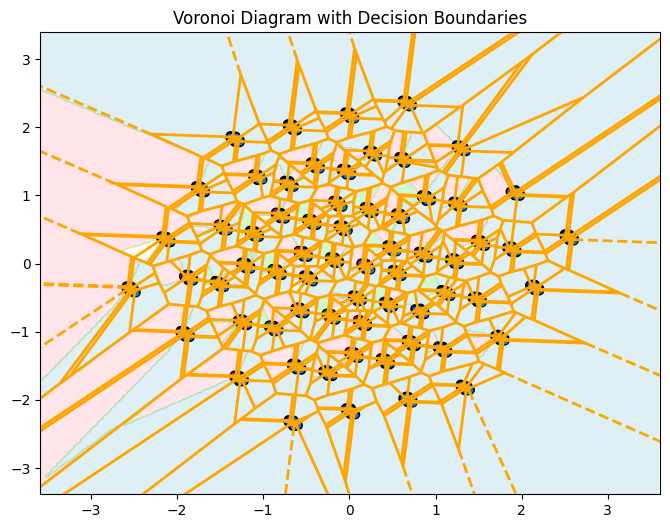

In [36]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
data = pd.read_csv('car_evaluation.csv')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop(columns=['decision'])
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the KNN model on the PCA-transformed training data
k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_pca, y_train)
def plot_voronoi(X, y, model):
    vor = Voronoi(X)
    plt.figure(figsize=(8, 6))
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['pink', 'lightgreen', 'lightblue', 'lightyellow'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green', 'blue', 'yellow']), edgecolor='k')
    plt.title('Voronoi Diagram with Decision Boundaries')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
plot_voronoi(X_train_pca, y_train, knn_model)


### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

1.In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.



The difference between the uniform and distance weighting options in the K-Nearest Neighbors (KNN) algorithm lies in how the algorithm considers the importance of the neighbors when making a prediction for a new data point.

1. Uniform Weights (weights='uniform'):

Definition: All k-nearest neighbors are treated equally, regardless of their distance to the query point.

Prediction: The class label is determined by a simple majority vote among the nearest neighbors.

Effect: Each of the k-nearest neighbors contributes equally to the final prediction. This can be effective when the data points are generally well-separated or when you don't expect that closer points should have more influence than farther points.

Example:
If you have three nearest neighbors with distances 1.0, 2.0, and 3.0, each of these neighbors has the same influence on the prediction, even though they are at different distances.

Pros:
Simple and easy to understand.
Works well when all neighbors are expected to contribute equally to the decision.

Cons:
Might not be as accurate when closer neighbors should have more influence than farther ones, especially in cases where data is noisy or has clusters.

2. Distance Weights (weights='distance'):

Definition: Neighbors closer to the query point have more influence on the prediction than those farther away.

Prediction: The contribution of each neighbor to the prediction is weighted by the inverse of its distance from the query point. Closer neighbors have a larger weight.

Effect: This approach accounts for the fact that neighbors that are closer to the query point are likely more similar to it and therefore should have more influence on the final prediction.

Example:

If you have three nearest neighbors with distances 1.0, 2.0, and 3.0, the first neighbor (distance 1.0) will have more influence on the prediction than the second or third neighbors. The weights might be something like 1.0, 0.5, and 0.33, respectively.

Pros:
Often more accurate because it gives higher importance to closer neighbors.
Reduces the influence of outliers or distant points that might otherwise skew the prediction.

Cons:
Slightly more complex to implement.
If the nearest neighbors are not sufficiently close, the model might be overly sensitive to a few points, which could introduce bias.

When to Use Each:
Uniform Weights: Suitable when the assumption is that all points are equally important, regardless of their distance. This might be useful in scenarios where data is well-distributed and there are no strong gradients in the data density.

Distance Weights: Preferable when it's assumed that closer points should have more influence on the outcome, which is often the case in real-world scenarios where proximity usually indicates similarity. It can handle scenarios where the data has varying density or clusters better.

Visual Example in Decision Boundaries:

When you plot decision boundaries:

Uniform Weights: The boundaries are more linear and simpler, as every neighbor contributes equally.

Distance Weights: The boundaries might be more irregular or closer to the actual clusters of data, reflecting the increased influence of closer points.

In summary, the choice between uniform and distance weights depends on the nature of your data and the specific problem you're trying to solve. If closer neighbors are inherently more informative for predicting the outcome, then distance weighting is usually more appropriate.









2.What do you think could be the drawbacks of using KNN ?




K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm, but it has several drawbacks that can make it less suitable for certain types of tasks or datasets.

1. Computational Complexity:
Training: KNN is known as a "lazy learner" because it doesn't involve an explicit training phase. Instead, it stores all the training data and performs classification by calculating the distance between the query point and all points in the training set. This can be computationally expensive, especially with large datasets.
Prediction: The prediction phase can be slow because it requires calculating distances to all training examples for each query point. This can be especially problematic for real-time or low-latency applications.
2. Memory Usage:
KNN requires storing the entire training dataset, which can lead to high memory usage, especially with large datasets. As the dataset grows, the amount of memory required increases, making KNN less feasible for very large datasets.
3. Curse of Dimensionality:
In high-dimensional spaces, the distance between points becomes less meaningful due to the "curse of dimensionality." As the number of dimensions increases, the distances between data points become increasingly similar, making it difficult to distinguish between neighbors and non-neighbors. This can lead to poor performance in high-dimensional data unless dimensionality reduction techniques (like PCA) are applied first.
4. Sensitivity to Irrelevant Features:
KNN is sensitive to irrelevant or noisy features because all features are treated equally when calculating distances. If irrelevant features are included in the data, they can distort the distance calculation and reduce the accuracy of the algorithm. Feature selection or weighting can help mitigate this, but it requires additional preprocessing.
5. Choice of Distance Metric:
The performance of KNN depends heavily on the choice of distance metric (e.g., Euclidean, Manhattan). The default Euclidean distance might not be the best metric for all types of data, particularly if the features have different scales or distributions. Choosing the wrong metric can lead to poor classification results.
6. Imbalanced Data:
KNN can struggle with imbalanced datasets where some classes are underrepresented. In such cases, the algorithm might be biased toward the majority class, leading to poor performance on minority classes. This issue is common in many classification algorithms but can be particularly problematic for KNN due to its reliance on neighbors.
7. Sensitivity to Outliers:
KNN is sensitive to outliers, as outliers can have a disproportionate effect on the nearest neighbors and hence on the final prediction. This is especially true when using uniform weights, as outliers can skew the majority vote in their favor.
8. Difficulty with Large Feature Spaces:
When the number of features is large, KNN may require a large number of samples to achieve good performance. The reason is that with more features, the data becomes sparse, and finding a sufficient number of neighbors that are close to the query point becomes challenging.
9. No Explicit Model or Interpretability:
KNN does not produce an explicit model or set of parameters that describe the relationship between the input features and the output labels. This lack of a model makes it difficult to interpret how the algorithm is making decisions or to generalize beyond the specific dataset.
10. Non-Scalability:
Scaling KNN to large datasets or real-time applications can be challenging due to its high computational cost for prediction. Techniques such as approximate nearest neighbors (ANN) or data partitioning can help but may introduce complexity or reduce accuracy

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
